In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carprice/car_prediction_data.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [34]:
dataset = pd.read_csv("/kaggle/input/carprice/car_prediction_data.csv")
print("Dataset Loaded Successfully ✅")


Dataset Loaded Successfully ✅


In [35]:
display(dataset.head(5))

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [36]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [37]:
print(dataset.isnull().sum())

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64


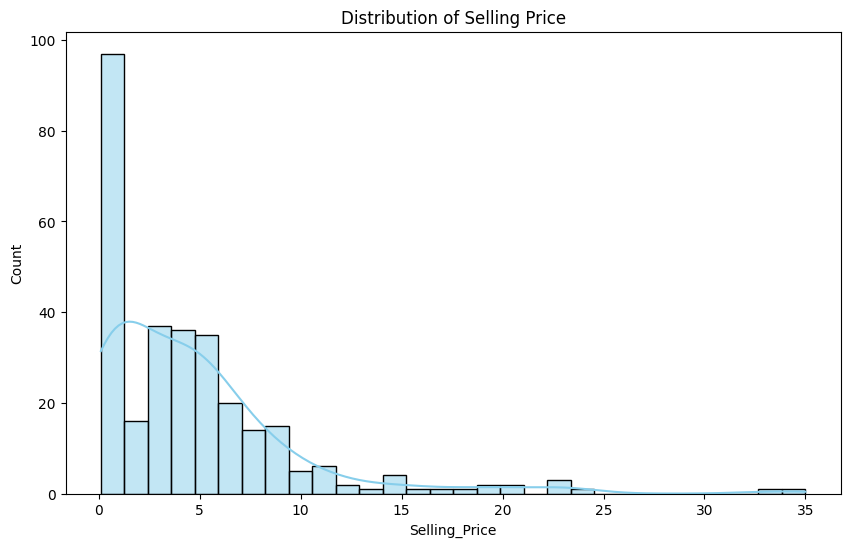

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['Selling_Price'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Selling Price")
plt.show()

In [39]:
le_car = LabelEncoder()
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_trans = LabelEncoder()


In [40]:
dataset['Car_Name'] = le_car.fit_transform(dataset['Car_Name'])
dataset['Fuel_Type'] = le_fuel.fit_transform(dataset['Fuel_Type'])
dataset['Seller_Type'] = le_seller.fit_transform(dataset['Seller_Type'])
dataset['Transmission'] = le_trans.fit_transform(dataset['Transmission'])


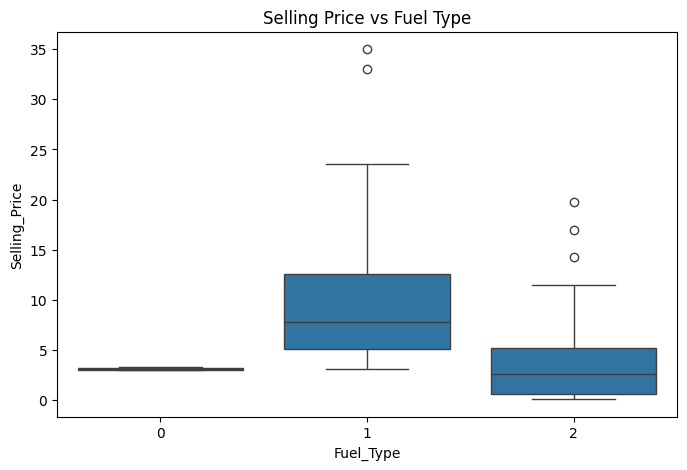

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=dataset)
plt.title("Selling Price vs Fuel Type")
plt.show()


In [42]:
X = dataset.drop('Selling_Price', axis=1)
y = dataset['Selling_Price']


In [43]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [44]:
# 5️⃣ Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

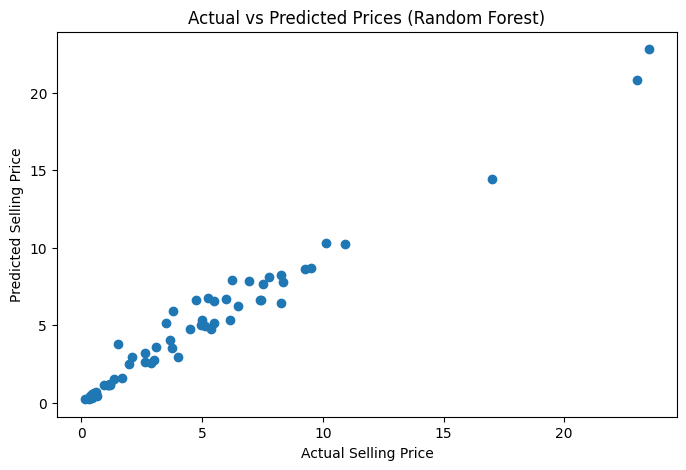

In [49]:
rf_best = models["Random Forest"]
y_pred_rf = rf_best.predict(x_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()


In [50]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\n{name} Performance:")
    print("R² Score:", round(r2_score(y_test, y_pred)*100, 2), "%")
    print("MSE:", round(mean_squared_error(y_test, y_pred), 3))
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))



Linear Regression Performance:
R² Score: 84.66 %
MSE: 3.535
MAE: 1.214

Decision Tree Performance:
R² Score: 94.63 %
MSE: 1.236
MAE: 0.699

Random Forest Performance:
R² Score: 96.73 %
MSE: 0.753
MAE: 0.575


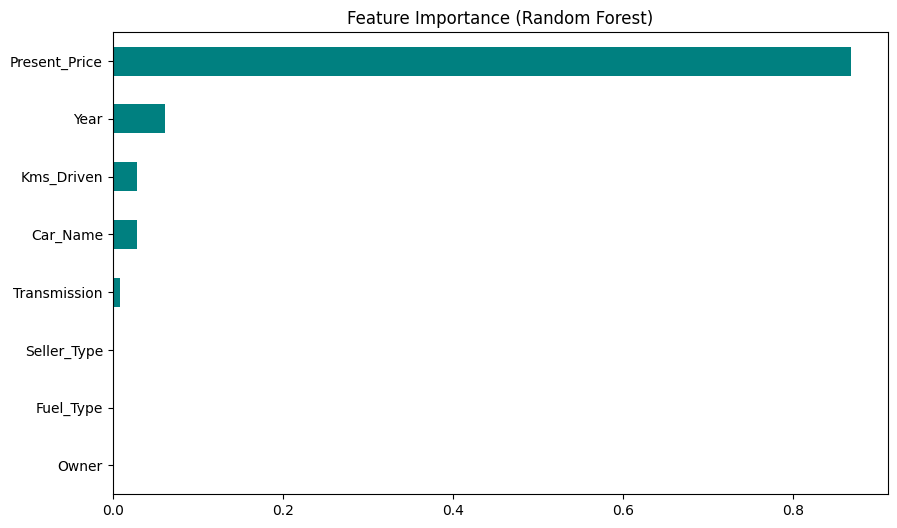

In [51]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [52]:
# ===============================
# PREDICTION DEMO
# ===============================

new_car = pd.DataFrame([{
    'Car_Name': le_car.transform(['sx4'])[0],
    'Year': 2012,
    'Present_Price': 9.54,
    'Kms_Driven': 43000,
    'Fuel_Type': le_fuel.transform(['Diesel'])[0],
    'Seller_Type': le_seller.transform(['Dealer'])[0],
    'Transmission': le_trans.transform(['Manual'])[0],
    'Owner': 0
}])

new_car_scaled = scaler.transform(new_car)
prediction = rf.predict(new_car_scaled)

print("Predicted Selling Price:", round(prediction[0], 2), "Lakh")


Predicted Selling Price: 4.59 Lakh


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
